In [1]:
# pip install ggplot

In [2]:
# pip install yellowbrick

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# from plotnine import *

import seaborn 

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score


from sklearn.cluster import AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt

# import ggplot 

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [4]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

# d1.head()
d1

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892
...,...,...
195,-1.294810,-0.714977
196,-1.016569,-0.580077
197,-0.503654,0.220184
198,-0.751128,-0.491551


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


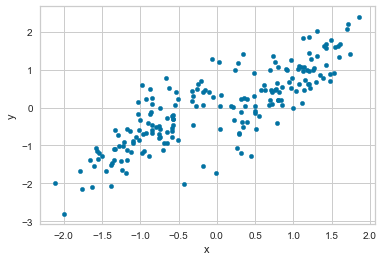

In [5]:
d1.plot.scatter(x='x',y='y')

In [6]:
features_1 = d1.iloc[:,0:2]
features_1

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892
...,...,...
195,-1.294810,-0.714977
196,-1.016569,-0.580077
197,-0.503654,0.220184
198,-0.751128,-0.491551


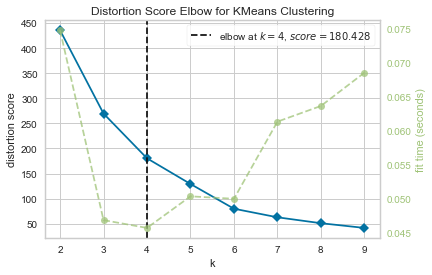

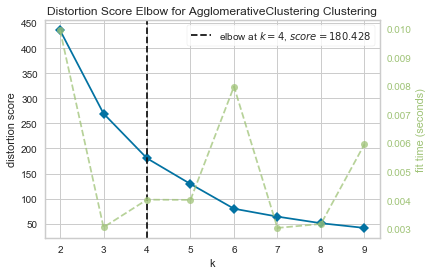

In [96]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d1)        
visualizer.show()



model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d1)        
visualizer.show()




# nearest_neighbors = NearestNeighbors(n_neighbors=5)
# neighbors = nearest_neighbors.fit(d1)
# distances, indices = neighbors.kneighbors(d1)
# distances = np.sort(distances[:,4], axis=0)
# fig = plt.figure(figsize=(10, 5))
# plt.plot(distances)
# plt.xlabel("Points")
# plt.ylabel("Distance")

In [95]:
hac = AgglomerativeClustering(4)
km = KMeans(4)
gm = GaussianMixture(2)


clustering_1 = DBSCAN(eps=0.5, min_samples=3).fit(features_1)
hac.fit(d1[["x","y"]])
km.fit(d1[["x","y"]])
gm.fit(d1[["x","y"]])

d1["hac"] = hac.labels_
d1["km"] = km.labels_
d1["gm"] = gm.predict(d1[["x","y"]])
d1["dbs"] = clustering_1.labels_


In [87]:
d1["dbs"].unique()

array([ 0, -1], dtype=int64)

In [88]:
labels_1 =d1["dbs"]
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)
print(f"number of clusters {n_clusters_1}")
print(f"number of noise {n_noise_1}")

number of clusters 2
number of noise 4


In [114]:
probs = gm.predict_proba(d1[["x","y"]])
print(probs[:10].round(3))

[[0.999 0.001]
 [0.968 0.032]
 [1.    0.   ]
 [0.904 0.096]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]]


In [89]:
# d1

In [90]:
# fg = seaborn.FacetGrid(data=d1, hue='hac', aspect=1.61)
# fg.map(plt.scatter, 'x', 'y').add_legend()

In [91]:
# fg = seaborn.FacetGrid(data=d1, hue='km', aspect=1.61)
# fg.map(plt.scatter, 'x', 'y').add_legend()

In [92]:
# fg = seaborn.FacetGrid(data=d1, hue='gm', aspect=1.61)
# fg.map(plt.scatter, 'x', 'y').add_legend()

In [93]:
# fg = seaborn.FacetGrid(data=d1, hue='dbs', aspect=1.61)
# fg.map(plt.scatter, 'x', 'y').add_legend()

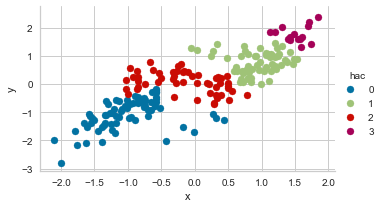

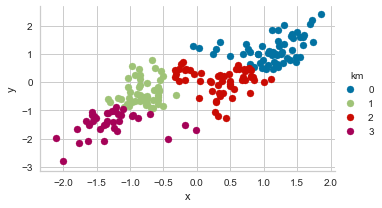

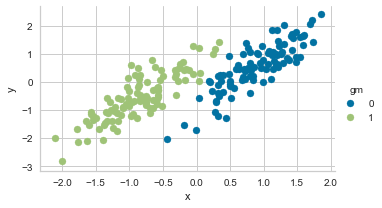

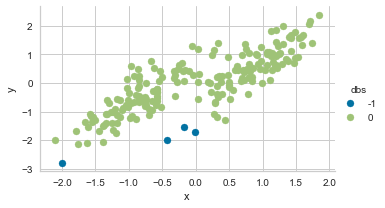

In [94]:
fg = seaborn.FacetGrid(data=d1, hue='hac', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d1, hue='km', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d1, hue='gm', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d1, hue='dbs', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [17]:
score_Agg = silhouette_score(d1, d1["hac"], metric='euclidean')
score_KMeans = silhouette_score(d1, d1["km"], metric='euclidean')
score_Gaussian = silhouette_score(d1, d1["gm"], metric='euclidean')
score_DBSCAN = silhouette_score(d1, d1["dbs"], metric='euclidean')

print(f"agglomerative cluster score : {score_Agg}")
print(f"KMeans cluster score : {score_KMeans}")
print(f"Gaussian cluster score : {score_Gaussian}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

agglomerative cluster score : 0.46718545858934596
KMeans cluster score : 0.4785806202158984
Gaussian cluster score : 0.3475048138641248
DBSCAN cluster score : 0.25137135698883556


## Dataset 2

In [18]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

d2

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589
...,...,...
295,-0.522015,1.682249
296,-0.195039,1.177602
297,0.004994,1.111269
298,-1.954443,0.506557


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


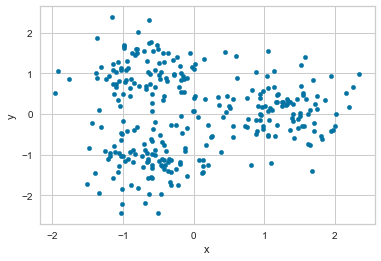

In [19]:
d2.plot.scatter(x='x',y='y')

In [20]:
features_2 = d2.iloc[:,0:2]
# features_2

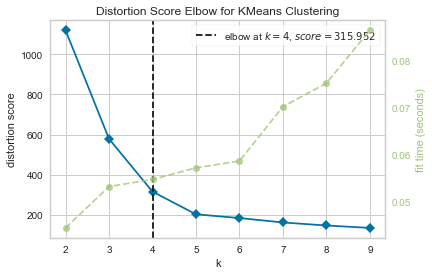

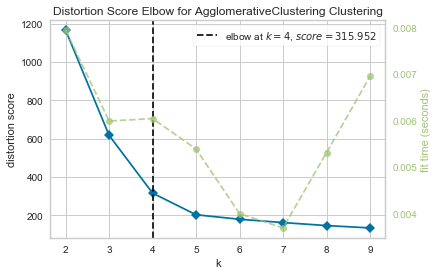

In [97]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d2)        
visualizer.show()



model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d2)        
visualizer.show()



# nearest_neighbors = NearestNeighbors(n_neighbors=5)
# neighbors = nearest_neighbors.fit(d2)
# distances, indices = neighbors.kneighbors(d2)
# distances = np.sort(distances[:,4], axis=0)
# fig = plt.figure(figsize=(10, 5))
# plt.plot(distances)
# plt.xlabel("Points")
# plt.ylabel("Distance")

In [67]:
hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)


clustering_2 = DBSCAN(eps=0.2, min_samples=4).fit(features_2)
hac.fit(d2[["x","y"]])
km.fit(d2[["x","y"]])
gm.fit(d2[["x","y"]])

d2["hac"] = hac.labels_
d2["km"] = km.labels_
d2["gm"] = gm.predict(d2[["x","y"]])
d2["dbs"] = clustering_2.labels_



0.484782503033216


In [68]:
d2["dbs"].unique()

array([-1,  0,  1,  4,  2,  3], dtype=int64)

In [24]:
labels_2 =d2["dbs"]
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
n_noise_2 = list(labels_2).count(-1)
print(f"number of clusters {n_clusters_2}")
print(f"number of noise {n_noise_2}")

number of clusters 6
number of noise 76


In [115]:
probs = gm.predict_proba(d2[["x","y"]])
print(probs[:10].round(3))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


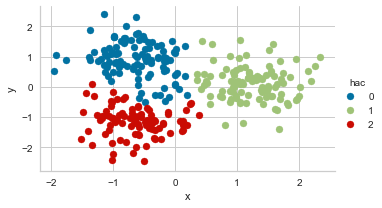

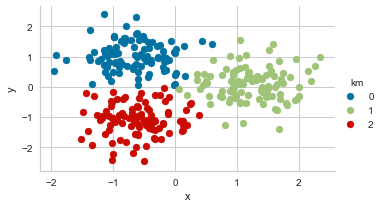

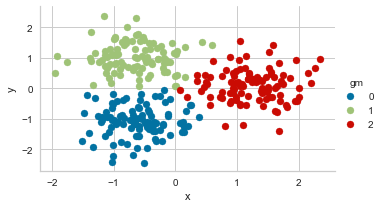

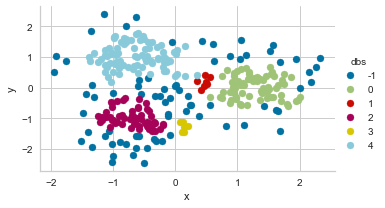

In [25]:
fg = seaborn.FacetGrid(data=d2, hue='hac', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d2, hue='km', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d2, hue='gm', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d2, hue='dbs', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [26]:
score_Agg = silhouette_score(d2, d2["hac"], metric='euclidean')
score_KMeans = silhouette_score(d2, d2["km"], metric='euclidean')
score_Gaussian = silhouette_score(d2, d2["gm"], metric='euclidean')
score_DBSCAN = silhouette_score(d2, d2["dbs"], metric='euclidean')

print(f"agglomerative cluster score : {score_Agg}")
print(f"KMeans cluster score : {score_KMeans}")
print(f"Gaussian cluster score : {score_Gaussian}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

agglomerative cluster score : 0.5487761349517732
KMeans cluster score : 0.5648801242526044
Gaussian cluster score : 0.5648801242526044
DBSCAN cluster score : 0.4778476406547619


## Dataset 3

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


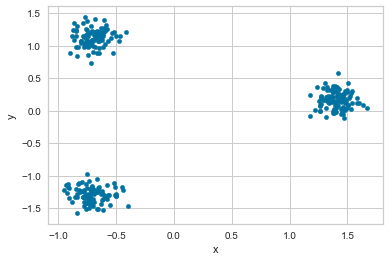

In [27]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

d3.plot.scatter(x='x',y='y')

In [28]:
features_3 = d3.iloc[:,0:2]

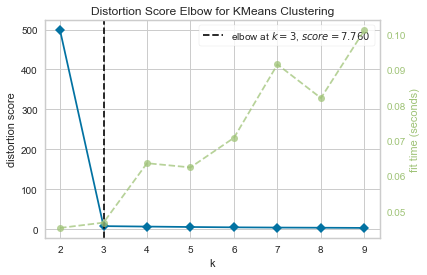

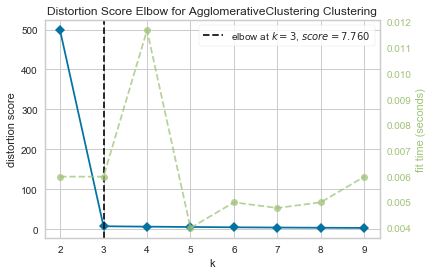

In [98]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d3)        
visualizer.show()



model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d3)        
visualizer.show()



In [30]:
hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)


clustering_3 = DBSCAN(eps=0.5, min_samples=5).fit(features_3)
hac.fit(d3[["x","y"]])
km.fit(d3[["x","y"]])
gm.fit(d3[["x","y"]])

d3["hac"] = hac.labels_
d3["km"] = km.labels_
d3["gm"] = gm.predict(d3[["x","y"]])
d3["dbs"] = clustering_3.labels_


In [31]:
d3["dbs"].unique()

array([0, 1, 2], dtype=int64)

In [32]:
labels_3 =d3["dbs"]
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)
print(f"number of clusters {n_clusters_3}")
print(f"number of noise {n_noise_3}")

number of clusters 3
number of noise 0


In [116]:
probs = gm.predict_proba(d3[["x","y"]])
print(probs[:10].round(3))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


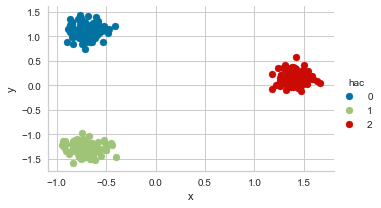

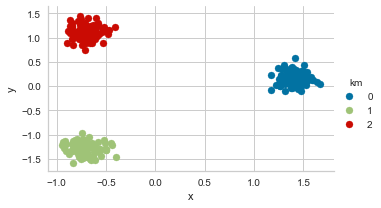

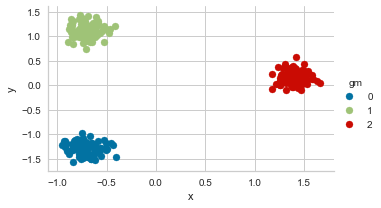

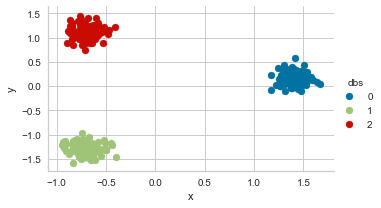

In [33]:
fg = seaborn.FacetGrid(data=d3, hue='hac', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d3, hue='km', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d3, hue='gm', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d3, hue='dbs', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [34]:
score_Agg = silhouette_score(d3, d3["hac"], metric='euclidean')
score_KMeans = silhouette_score(d3, d3["km"], metric='euclidean')
score_Gaussian = silhouette_score(d3, d3["gm"], metric='euclidean')
score_DBSCAN = silhouette_score(d3, d3["dbs"], metric='euclidean')

print(f"agglomerative cluster score : {score_Agg}")
print(f"KMeans cluster score : {score_KMeans}")
print(f"Gaussian cluster score : {score_Gaussian}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

agglomerative cluster score : 0.9389418019947724
KMeans cluster score : 0.9389418019947724
Gaussian cluster score : 0.9389418019947724
DBSCAN cluster score : 0.9389418019947724


In [35]:
# grab only clustered data points

# overall 


## Dataset 4

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


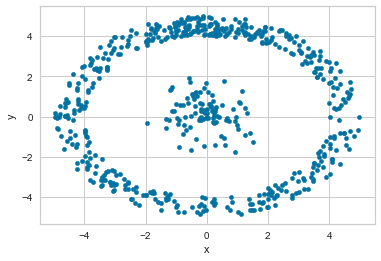

In [36]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

d4.plot.scatter(x='x',y='y')

In [37]:
features_4 = d4.iloc[:,0:2]

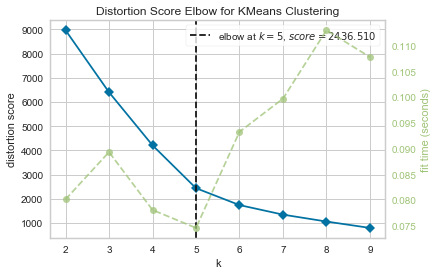

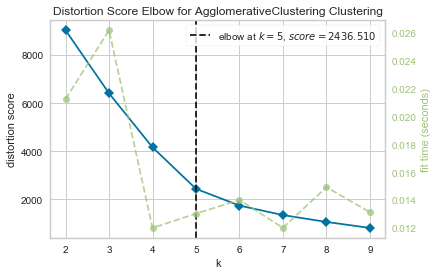

In [99]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d4)        
visualizer.show()



model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d4)        
visualizer.show()




# nearest_neighbors = NearestNeighbors(n_neighbors=5)
# neighbors = nearest_neighbors.fit(d4)
# distances, indices = neighbors.kneighbors(d4)
# distances = np.sort(distances[:,4], axis=0)
# fig = plt.figure(figsize=(10, 5))
# plt.plot(distances)
# plt.xlabel("Points")
# plt.ylabel("Distance")

In [39]:
hac = AgglomerativeClustering(5)
km = KMeans(5)
gm = GaussianMixture(5)


clustering_4 = DBSCAN(eps=1.5, min_samples=3).fit(features_4)
clustering_4_2 = DBSCAN(eps=0.5, min_samples=3).fit(features_4)



hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])
d4["dbs"] = clustering_4.labels_
d4["dbs2"] = clustering_4_2.labels_


In [40]:
labels_4 = d4["dbs"]
n_clusters_4 = len(set(labels_4)) - (1 if -1 in labels_4 else 0)
n_noise_4 = list(labels_4).count(-1)
print(f"number of clusters {n_clusters_4}")
print(f"number of noise {n_noise_4}")


number of clusters 2
number of noise 0


In [41]:
labels_4_2 = d4["dbs2"]
n_clusters_4_2 = len(set(labels_4_2)) - (1 if -1 in labels_4_2 else 0)
n_noise_4_2 = list(labels_4_2).count(-1)
print(f"number of clusters {n_clusters_4_2}")
print(f"number of noise {n_noise_4_2}")


number of clusters 5
number of noise 6


In [117]:
probs = gm.predict_proba(d4[["x","y"]])
print(probs[:10].round(3))

[[0.021 0.979]
 [0.999 0.001]
 [0.004 0.996]
 [0.    1.   ]
 [0.021 0.979]
 [0.864 0.136]
 [0.    1.   ]
 [1.    0.   ]
 [0.281 0.719]
 [0.    1.   ]]


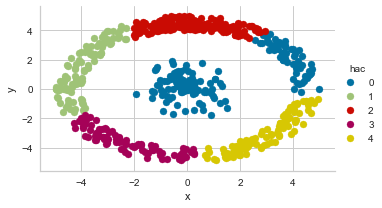

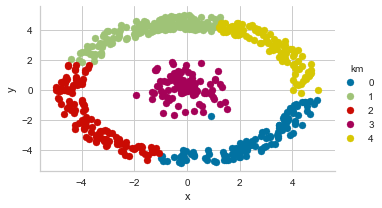

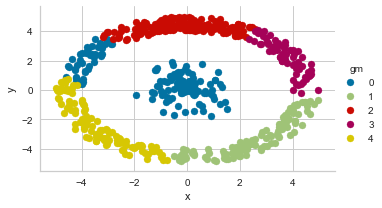

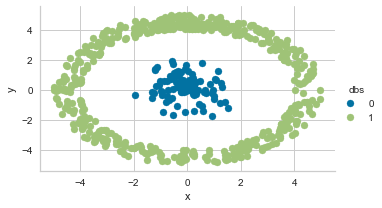

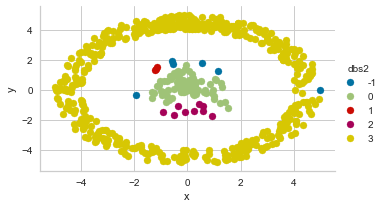

In [42]:
fg = seaborn.FacetGrid(data=d4, hue='hac', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d4, hue='km', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d4, hue='gm', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d4, hue='dbs', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d4, hue='dbs2', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [43]:
score_Agg = silhouette_score(d4, d4["hac"], metric='euclidean')
score_KMeans = silhouette_score(d4, d4["km"], metric='euclidean')
score_Gaussian = silhouette_score(d4, d4["gm"], metric='euclidean')
score_DBSCAN = silhouette_score(d4, d4["dbs"], metric='euclidean')
score_DBSCAN2 = silhouette_score(d4, d4["dbs2"], metric='euclidean')

print(f"agglomerative cluster score : {score_Agg}")
print(f"KMeans cluster score : {score_KMeans}")
print(f"Gaussian cluster score : {score_Gaussian}")
print(f"DBSCAN cluster score : {score_DBSCAN}")
print(f"DBSCAN cluster score : {score_DBSCAN2}")

agglomerative cluster score : 0.47643658373661707
KMeans cluster score : 0.590252262887577
Gaussian cluster score : 0.5480297309194913
DBSCAN cluster score : 0.17452257173143815
DBSCAN cluster score : -0.014668754667607503


## Dataset 5

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


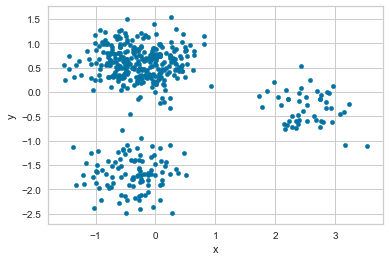

In [44]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

d5.plot.scatter(x='x',y='y')

In [45]:
features_5 = d5.iloc[:,0:2]

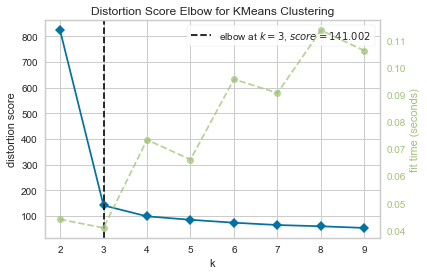

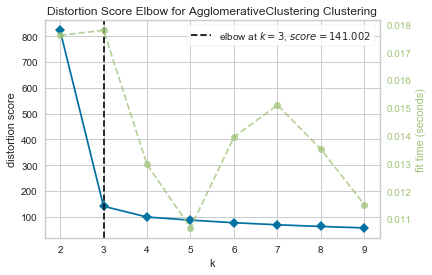

In [100]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d5)        
visualizer.show()



model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d5)        
visualizer.show()



# nearest_neighbors = NearestNeighbors(n_neighbors=3)
# neighbors = nearest_neighbors.fit(d5)
# distances, indices = neighbors.kneighbors(d5)
# distances = np.sort(distances[:,2], axis=0)
# fig = plt.figure(figsize=(10, 5))
# plt.plot(distances)
# plt.xlabel("Points")
# plt.ylabel("Distance")

In [47]:
hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)


clustering_5 = DBSCAN(eps=0.5, min_samples=15).fit(features_5)



hac.fit(d5[["x","y"]])
km.fit(d5[["x","y"]])
gm.fit(d5[["x","y"]])

d5["hac"] = hac.labels_
d5["km"] = km.labels_
d5["gm"] = gm.predict(d5[["x","y"]])
d5["dbs"] = clustering_5.labels_

In [48]:
d5["dbs"].unique()

array([ 0, -1,  1,  2], dtype=int64)

In [49]:
labels_5 = d5["dbs"]
n_clusters_5 = len(set(labels_5)) - (1 if -1 in labels_5 else 0)
n_noise_5 = list(labels_5).count(-1)
print(f"number of clusters {n_clusters_5}")
print(f"number of noise {n_noise_5}")


number of clusters 4
number of noise 2


In [118]:
probs = gm.predict_proba(d5[["x","y"]])
print(probs[:10].round(3))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


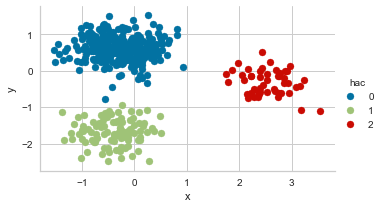

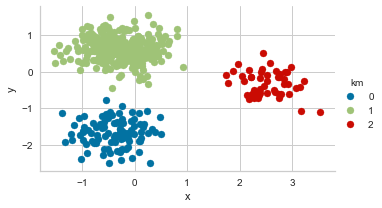

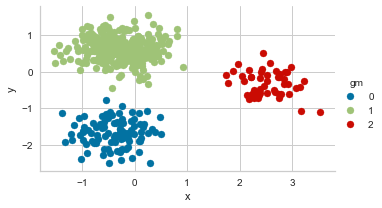

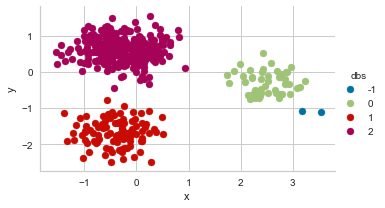

In [50]:
fg = seaborn.FacetGrid(data=d5, hue='hac', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d5, hue='km', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d5, hue='gm', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d5, hue='dbs', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [51]:
score_Agg = silhouette_score(d5, d5["hac"], metric='euclidean')
score_KMeans = silhouette_score(d5, d5["km"], metric='euclidean')
score_Gaussian = silhouette_score(d5, d5["gm"], metric='euclidean')
score_DBSCAN = silhouette_score(d5, d5["dbs"], metric='euclidean')

print(f"agglomerative cluster score : {score_Agg}")
print(f"KMeans cluster score : {score_KMeans}")
print(f"Gaussian cluster score : {score_Gaussian}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

agglomerative cluster score : 0.7791786043943835
KMeans cluster score : 0.7810974680713285
Gaussian cluster score : 0.7810974680713285
DBSCAN cluster score : 0.7566619599363533


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


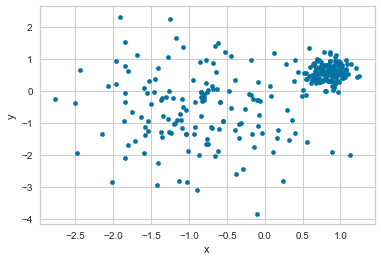

In [52]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

d6.plot.scatter(x='x',y='y')

In [53]:
features_6 = d6.iloc[:,0:2]


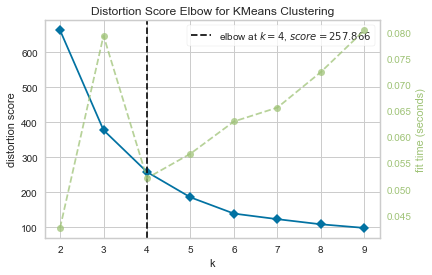

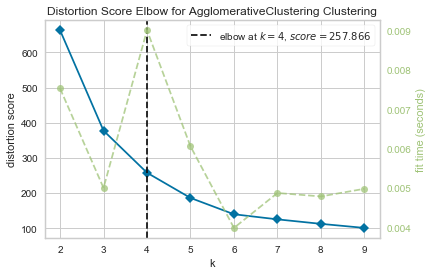

In [101]:
# parameters

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d6)        
visualizer.show()



model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(d6)        
visualizer.show()



In [55]:
hac = AgglomerativeClustering(4)
km = KMeans(4)
gm = GaussianMixture(4)


clustering_6 = DBSCAN(eps=0.5, min_samples=4).fit(features_6)



hac.fit(d6[["x","y"]])
km.fit(d6[["x","y"]])
gm.fit(d6[["x","y"]])

d6["hac"] = hac.labels_
d6["km"] = km.labels_
d6["gm"] = gm.predict(d6[["x","y"]])
d6["dbs"] = clustering_6.labels_


In [56]:
d6["dbs"].unique()

array([ 0,  1, -1], dtype=int64)

In [57]:
labels_6 = d6["dbs"]
n_clusters_6 = len(set(labels_6)) - (1 if -1 in labels_6 else 0)
n_noise_6 = list(labels_6).count(-1)
print(f"number of clusters {n_clusters_6}")
print(f"number of noise {n_noise_6}")


number of clusters 3
number of noise 12


In [121]:
probs = gm.predict_proba(d6[["x","y"]])
print(probs[:10].round(3))

[[0.999 0.001]
 [1.    0.   ]
 [1.    0.   ]
 [0.998 0.002]
 [0.357 0.643]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.999 0.001]]


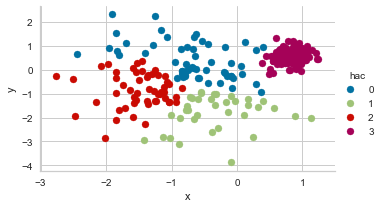

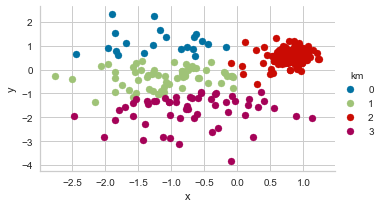

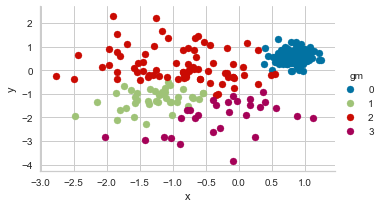

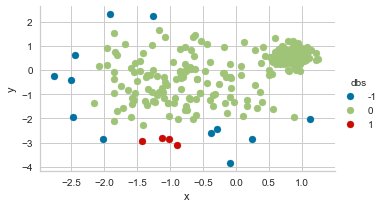

In [58]:
fg = seaborn.FacetGrid(data=d6, hue='hac', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d6, hue='km', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d6, hue='gm', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()


fg = seaborn.FacetGrid(data=d6, hue='dbs', aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [59]:
score_Agg = silhouette_score(d6, d6["hac"], metric='euclidean')
score_KMeans = silhouette_score(d6, d6["km"], metric='euclidean')
score_Gaussian = silhouette_score(d6, d6["gm"], metric='euclidean')
score_DBSCAN = silhouette_score(d6, d6["dbs"], metric='euclidean')

print(f"agglomerative cluster score : {score_Agg}")
print(f"KMeans cluster score : {score_KMeans}")
print(f"Gaussian cluster score : {score_Gaussian}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

agglomerative cluster score : 0.6622101273679237
KMeans cluster score : 0.6029272078138354
Gaussian cluster score : 0.6413397791684906
DBSCAN cluster score : 0.32089237486798
